# NLP

One-hot encoding: V is a vector = [0,0,0,0, ..., 0]. where we map each word to an integer and set its position to one in the vector

If our sentence has T words, then our sentence becomes a T x V matrix

**Embedding** : assign each word to a D-dimensional vector.
- Convert words to unique integers
- Use those integers to index a weight matriux (embedding matrix)
- We use pre-trained word vectors (Word2Vec, GloVe)
- We freeze/fix the embedding layer weights
- Input -> Embedding layer -> LSTM -> Dense -> Output

Tokenization : Multiple workds to single words, remove punctuation

Pytorch: 
- Padding = 1
- Unknown = 0

- Post-pading : Pad is added to the end
- Pre-paddding : Pad is added to the begining 

If our text classification RNN reads the input from left to right , the pre-padding might be better. Vanishing gradient problem.

Corpus : document set

In [1]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv
!head spam.csv

File ‘spam.csv’ already there; not retrieving.

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam':1})

In [7]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [9]:
print(df_train.shape, df_test.shape)

(3733, 3) (1839, 3)


In [10]:
idx = 1
word2idx = {'<PAD>' : 0}

In [11]:
for i,row in df_train.iterrows():
    tokens = row['data'].lower().split()
    for token in tokens:
        if token not in word2idx:
            word2idx[token] = idx
            idx +=1

In [12]:
word2idx

{'<PAD>': 0,
 'lol': 1,
 '..': 2,
 '*grins*': 3,
 "i'm": 4,
 'not': 5,
 'babe,': 6,
 'but': 7,
 'thanks': 8,
 'for': 9,
 'thinking': 10,
 'of': 11,
 'me!': 12,
 'ok.': 13,
 'every': 14,
 'night': 15,
 'take': 16,
 'a': 17,
 'warm': 18,
 'bath': 19,
 'drink': 20,
 'cup': 21,
 'milk': 22,
 'and': 23,
 "you'll": 24,
 'see': 25,
 'work': 26,
 'magic.': 27,
 'you': 28,
 'still': 29,
 'need': 30,
 'to': 31,
 'loose': 32,
 'weight.': 33,
 'just': 34,
 'so': 35,
 'that': 36,
 'know': 37,
 "hi'": 38,
 'test': 39,
 'on': 40,
 '&lt;#&gt;': 41,
 'rd': 42,
 '....': 43,
 'how': 44,
 'are': 45,
 'enjoying': 46,
 'this': 47,
 'semester?': 48,
 'care': 49,
 'brother.': 50,
 'then': 51,
 'u': 52,
 'ask': 53,
 'darren': 54,
 'go': 55,
 'n': 56,
 'pick': 57,
 'lor...': 58,
 'i': 59,
 'oso': 60,
 'sian': 61,
 'tmr': 62,
 'haf': 63,
 '2': 64,
 'meet': 65,
 'lect...': 66,
 'all': 67,
 'day': 68,
 'working': 69,
 'day:)except': 70,
 'saturday': 71,
 'sunday..': 72,
 'dear': 73,
 '0776xxxxxxx': 74,
 "u've": 75

In [13]:
len(word2idx)

10640

In [14]:
train_sentences_as_int = []
for i, row in df_train.iterrows():
    tokens = row['data'].lower().split()
    sentence_as_int = [word2idx[token] for token in tokens  if token in word2idx]
    train_sentences_as_int.append(sentence_as_int)

In [15]:
train_sentences_as_int

[[1, 2, 3, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  17,
  21,
  11,
  22,
  23,
  24,
  25,
  17,
  26,
  11,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  28,
  37],
 [38, 39, 40, 41, 42, 43],
 [44, 45, 28, 46, 47, 48, 16, 49, 50],
 [51, 52, 53, 54, 55, 56, 57, 52, 58, 7, 59, 60, 61, 62, 63, 64, 65, 66],
 [67, 68, 69, 70, 71, 23, 72],
 [73,
  74,
  75,
  76,
  77,
  31,
  78,
  47,
  79,
  80,
  81,
  82,
  31,
  83,
  84,
  85,
  86,
  31,
  87,
  88,
  89,
  90],
 [91, 92, 93, 94, 95, 96, 97],
 [98,
  99,
  47,
  100,
  4,
  101,
  102,
  31,
  103,
  104,
  23,
  105,
  106,
  107,
  108,
  35,
  109,
  110,
  111,
  28,
  112,
  110,
  31,
  113,
  103,
  28],
 [59,
  114,
  37,
  52,
  23,
  52,
  114,
  37,
  115,
  116,
  86,
  31,
  87,
  117,
  23,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130],
 [59, 131, 132, 133, 134, 9, 135, 136, 137, 138, 139, 140, 141],
 [142,
  79,
  

In [16]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
    tokens = row['data'].lower().split()
    sentence_as_int =  [word2idx[token] for token in tokens  if token in word2idx]
    test_sentences_as_int.append(sentence_as_int)

In [17]:
test_sentences_as_int

[[1879, 59, 331, 37, 1917, 716],
 [631, 7, 59, 331, 59, 30, 28, 1076],
 [59,
  331,
  37,
  588,
  31,
  240,
  31,
  113,
  289,
  11,
  47,
  35,
  122,
  210,
  53,
  7361,
  398,
  47,
  331,
  2643,
  115],
 [9,
  156,
  2571,
  31,
  658,
  17,
  2878,
  2879,
  1320,
  2194,
  2537,
  2880,
  31,
  2881,
  2882,
  2883,
  2884,
  2885,
  2886],
 [1062, 3598, 213, 226, 93, 17, 632, 34, 7083, 241, 248, 807],
 [137, 28, 386, 892, 474, 51, 113, 875, 3418, 468, 2151],
 [45, 28, 341, 93, 1934],
 [363,
  4436,
  4437,
  4438,
  1444,
  4439,
  7,
  4440,
  214,
  1466,
  35,
  331,
  4441,
  140,
  156,
  162,
  4442,
  340,
  340,
  340,
  1469,
  228,
  1261,
  4443,
  4,
  205,
  4444],
 [11,
  856,
  1215,
  4496,
  184,
  9,
  1287,
  23,
  214,
  443,
  1287,
  79,
  4500,
  9,
  362,
  159,
  1530],
 [2719, 59, 210, 41, 5911, 8737, 345, 28, 398, 228],
 [2779, 2282, 437],
 [426, 7287, 31, 2919, 1233, 9537],
 [4883, 301, 3287, 758, 2723, 57, 188, 104, 99, 304, 79, 2638],
 [59,
  1

In [18]:
len(test_sentences_as_int), len(train_sentences_as_int)

(1839, 3733)

In [19]:
def data_generator(X, y, batch_size = 32):
    X, y = shuffle(X, y)
    n_batches = int(np.ceil(len(y) / batch_size))
    for i in range(n_batches):
        end = min((i+1) * batch_size, len(y))
        
        X_batch = X[i * batch_size:end]
        y_batch = y[i * batch_size:end]
        max_len = np.max([len(x) for x in X_batch])
        for j in range(len(X_batch)):
            x = X_batch[j]
            pad = [0] * (max_len - len(x))
            X_batch[j] = pad + x 
            
        X_batch= torch.from_numpy(np.array(X_batch)).long()
        y_batch= torch.from_numpy(np.array(y_batch)).long()
        yield X_batch, y_batch

In [20]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
    print("inputs", inputs, "shape", inputs.shape)
    print("targets", targets, "shape", targets.shape)
    break

inputs tensor([[   0,    0,    0,  ...,  570,   28,  257],
        [   0,    0,    0,  ..., 8132, 1577,  272],
        [   0,    0,    0,  ...,  975,   35, 6810],
        ...,
        [   0,    0,    0,  ..., 6221,  861, 9096],
        [   0,    0,    0,  ...,   17, 1110, 2342],
        [   0,    0,    0,  ...,  583,  166, 8012]]) shape torch.Size([32, 71])
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0]) shape torch.Size([32])


In [21]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
    print("inputs", inputs, "shape", inputs.shape)
    print("targets", targets, "shape", targets.shape)
    break

inputs tensor([[    0,     0,     0,  ...,     0,     0,    97],
        [ 2007,    28,  2635,  ...,    28,   257,   161],
        [    0,     0,     0,  ..., 10525, 10526,  1226],
        ...,
        [    0,     0,     0,  ...,   122,  3129,  4326],
        [    0,     0,     0,  ...,    28,   555,  5679],
        [    0,     0,     0,  ...,  3315,   345,    13]]) shape torch.Size([32, 50])
targets tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0]) shape torch.Size([32])


In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [23]:
embed = nn.Embedding(len(word2idx), 20)
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
    out = embed(inputs)
    print(inputs.shape)
    print(out.shape)
    break

torch.Size([32, 40])
torch.Size([32, 40, 20])


In [24]:
class RNN(nn.Module):
    def __init__(self, n_vocab , embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden 
        self.K = n_outputs
        self.L = n_rnnlayers
        self.embed = nn.Embedding(self.V, self.D)
        self.rnn = nn.LSTM(
            input_size = self.D,
            hidden_size= self.M,
            num_layers = self.L,
            batch_first = True)
        self.fc = nn.Linear(self.M, self.K)
    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        out = self.embed(X)
        out, _ = self.rnn(out, (h0,c0))
        out, _ = torch.max(out,1)
        out = self.fc(out)
        return out

In [25]:
class CNN(nn.Module):
    def __init__(self, n_vocab , embed_dim, n_outputs):
        super(CNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.K = n_outputs
        self.embed = nn.Embedding(self.V, self.D)
        self.conv1 = nn.Conv1d(self.D, 32, 3, padding=1)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool1d(2)
        self.conv3 = nn.Conv1d(64, 128, 3, padding=1)
        
        self.fc = nn.Linear(128, self.K)
    def forward(self, X):
        out = self.embed(X)
        out = out.permute(0,2,1)
        out = self.conv1(out)
        out = F.relu(out)

        out = self.pool1(out) 
        out = self.conv2(out)
        out = F.relu(out)
 
        out = self.pool2(out) 
        out = self.conv3(out)
        out = F.relu(out)
        
        out = out.permute(0,2,1)
        
        out, _ = torch.max(out,1)
        out = self.fc(out)
        return out

In [26]:
# model= RNN(len(word2idx) , 20, 15, 1,1)
model= CNN(len(word2idx) , 20,1)
model.to(device)

CNN(
  (embed): Embedding(10640, 20)
  (conv1): Conv1d(20, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [27]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [28]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen  = lambda: data_generator(test_sentences_as_int, df_test.b_labels)


In [29]:
list(test_gen())

[(tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,    40,   111,  3817,  2853,   847,  2158,  1240],
          [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,     0,     0,     0,   146,   214,  7647,   725],
          [ 1940,   741,  1912,    23,   102,    17,  3788,   213,   436,    23,
              59,   345,    28,  1477,    17,   159,  6804,   623,   363,  1460,
              31,    28,    25,    28,    93,    17,  2727,    11,  6873],
          [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
               0,     0,     0,     0,  7470,  1193,    91,   178,   758],
          [    0,     0,     0,     0,     0,     0,

In [30]:
def gd(model, criterion, optimizer, n_epochs = 200 ):
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)
    # total number of iteration is in fact #n_epochs * #batches
    for it in range(n_epochs):
        train_loss = []
        for inputs, targets in train_gen():
            targets = targets.view(-1,1).float()
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        train_loss = np.mean(train_loss)

        
        test_loss = []
        for inputs, targets in test_gen():
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.view(-1,1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        train_losses[it] = train_loss
        test_losses[it] = test_loss
        if (it +1) %5 == 0:
            print(f'Epoch {it+1}/{n_epochs}, Train Loss {loss.item():.4f}, Test Loss {test_loss.item():.4f}')
    return train_losses, test_losses

train_losses, test_losses = gd(model, criterion, optimizer, 15)

Epoch 5/15, Train Loss 0.0162, Test Loss 0.1151
Epoch 10/15, Train Loss 0.0054, Test Loss 0.1201
Epoch 15/15, Train Loss 0.2112, Test Loss 0.1443


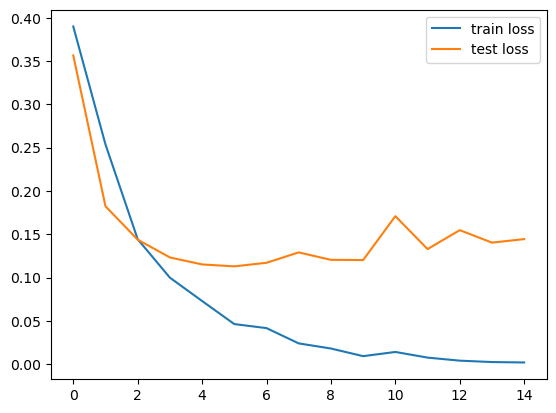

In [31]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [32]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9997, Test acc: 0.9744


In [33]:
text = df_test.iloc[100]['data']
text

'Hello- thanx for taking that call. I got a job! Starts on monday!'

In [36]:
tokens = text.lower().split()
text_int = [word2idx[token] for token in tokens if token in word2idx]
text_tensor = torch.from_numpy(
    np.array([text_int])
)
text_tensor

tensor([[1433,    9, 2147,   36, 5378,   59,  555,   17, 3359, 3363,   40, 3364]])

In [38]:
with torch.no_grad():
  out = model(text_tensor.to(device))
out

tensor([[-5.7956]], device='cuda:0')